In [43]:
import os
import numpy as np
import matplotlib.pylab as plt
from sklearn.externals.six import StringIO
from pprint import pprint
import sys
#!{sys.executable} -m pip install pydotplus
#!conda install --yes --prefix {sys.prefix} graphviz
import pydotplus 
import pandas

import sklearn.metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_digits

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import  cross_val_score, cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from IPython.display import Image
from scipy.stats import randint

In [12]:
#https://scikit-learn.org/0.21/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


# Carregar dados

In [45]:
# Carregar dataset IRIS
iris = load_iris()

# Carregar dataset digit recognizer
#digitData = pandas.read_csv('train.csv')
digits = load_digits()


In [4]:
# Carregando todas as características em X e os rótulos (labels, targets) em y
X = iris.data
y = iris.target #Sepal Length, Sepal Width, Petal Length and Petal Width.

print("As características são: " , iris.feature_names)


As características são:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# Classificação para K-NN (Exercício 1?)

## Exercício 2 (a) + (b)

In [5]:
def exercicio2(dataset, k):
    # Criar o classificador
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # 60% para treino e 40% para teste
    X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.4)
    # Treinar
    knn.fit(X_train, y_train)
    # Classificar
    knn.predict(X_test)
    # Avaliar a acurácia
    single_score = knn.score(X_test, y_test)
    
    # Cross-Validation 5-folds
    cross_scores = cross_val_score(knn, dataset.data, dataset.target, cv=5, scoring='f1_macro')
    cross_score = np.mean(cross_scores)
    
    return single_score, cross_score

In [20]:
k_values = range(2,31,1)

# Acurácias Hold-Out x Cross-Validation
simple_accs = []
crossv_accs = []

# Variar o K
for ki in k_values:
    
    # Testar
    sv_acc, cv_acc = exercicio2(iris, ki)
    # Salvar resultados
    simple_accs.append(sv_acc)
    crossv_accs.append(cv_acc)
    
    # Mostrar cada execução
    print(f"{ki}-nearest-neighbors")
    print("Hold-Out Accuracy:", sv_acc)
    print("Cross-Validation Accuracy:", cv_acc)

2-nearest-neighbors
Hold-Out Accuracy: 0.9333333333333333
Cross-Validation Accuracy: 0.946330472646262
3-nearest-neighbors
Hold-Out Accuracy: 0.95
Cross-Validation Accuracy: 0.9664818612187034
4-nearest-neighbors
Hold-Out Accuracy: 0.95
Cross-Validation Accuracy: 0.9732664995822891
5-nearest-neighbors
Hold-Out Accuracy: 0.9666666666666667
Cross-Validation Accuracy: 0.973165236323131
6-nearest-neighbors
Hold-Out Accuracy: 0.9666666666666667
Cross-Validation Accuracy: 0.9799498746867169
7-nearest-neighbors
Hold-Out Accuracy: 0.9833333333333333
Cross-Validation Accuracy: 0.9799498746867169
8-nearest-neighbors
Hold-Out Accuracy: 0.9833333333333333
Cross-Validation Accuracy: 0.9666499582289056
9-nearest-neighbors
Hold-Out Accuracy: 0.9333333333333333
Cross-Validation Accuracy: 0.9732999164578111
10-nearest-neighbors
Hold-Out Accuracy: 0.9666666666666667
Cross-Validation Accuracy: 0.9799832915622388
11-nearest-neighbors
Hold-Out Accuracy: 0.95
Cross-Validation Accuracy: 0.9799832915622388
12

Best k: 10


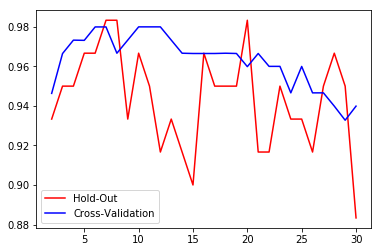

In [21]:
print("Best k:", k_values[np.argmax(crossv_accs)])

plt.plot(k_values, simple_accs, 'r', k_values, crossv_accs, 'b')
plt.legend(["Hold-Out", "Cross-Validation"])
plt.show()

# Exercício 3

In [36]:
scorings = ['f1_macro', 'accuracy', 'precision_macro', 'recall_macro']

def execicio3medidas(classifier, dataset, scoring=scorings):
    # Calcular scores
    scores = cross_validate(classifier, dataset.data, dataset.target, cv=5, scoring=scoring)
    
    return [
        np.mean(scores['test_f1_macro']),
        np.mean(scores['test_accuracy']),
        np.mean(scores['test_precision_macro']),
        np.mean(scores['test_recall_macro'])
    ]


## Decision Tree

F1 0.9532497911445279
Accuracy 0.9533333333333334
Precision 0.9550168350168349
Recall 0.9533333333333334
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.13043478 0.86956522]]


<function matplotlib.pyplot.show(*args, **kw)>

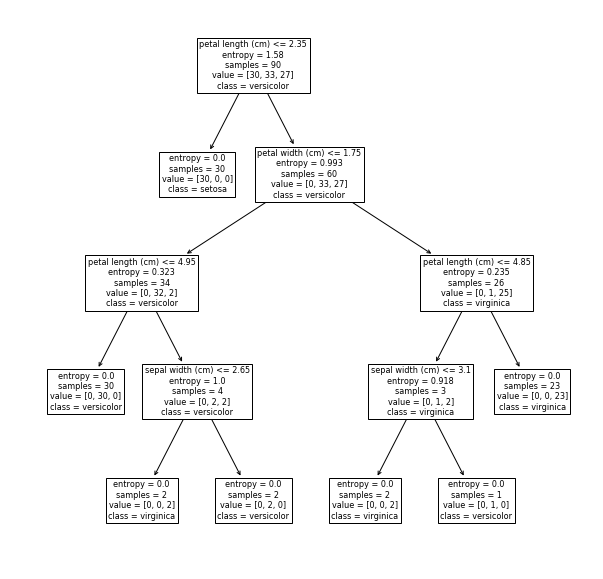

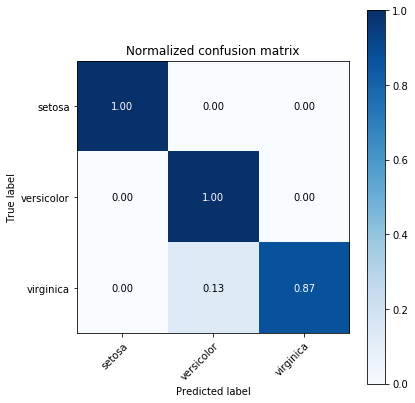

In [39]:
dtc = tree.DecisionTreeClassifier(criterion='entropy')
dtc_scores = execicio3medidas(dtc, iris)

print("F1", dtc_scores[0])
print("Accuracy", dtc_scores[1])
print("Precision", dtc_scores[2])
print("Recall", dtc_scores[3])

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.4)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

plt.figure(figsize=(10,10))
_ = tree.plot_tree(dtc, feature_names=iris.feature_names, class_names=iris.target_names)

plot_confusion_matrix(y_test, y_pred, iris.target_names, normalize=True)
plt.show

## Bayes

F1 0.9530472646262119
Accuracy 0.9533333333333334
Precision 0.9583838383838383
Recall 0.9533333333333331
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.94444444 0.05555556]
 [0.         0.05       0.95      ]]


<function matplotlib.pyplot.show(*args, **kw)>

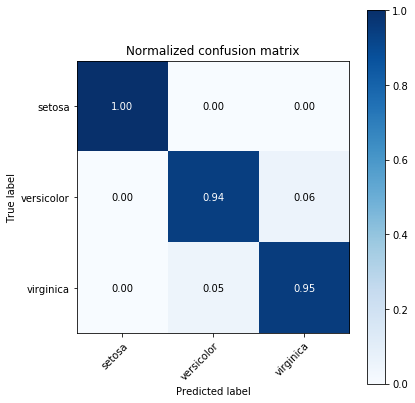

In [32]:
gnb = GaussianNB()
gnb_scores = execicio3medidas(gnb, iris)

print("F1", gnb_scores[0])
print("Accuracy", gnb_scores[1])
print("Precision", gnb_scores[2])
print("Recall", gnb_scores[3])

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.4)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
plot_confusion_matrix(y_test, y_pred, iris.target_names, normalize=True)
plt.show

## kNN

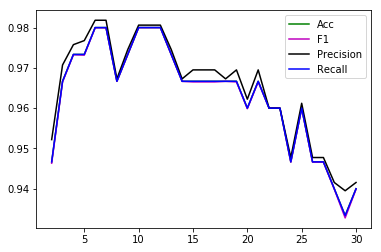

Best K: 10
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.15 0.85]]


<function matplotlib.pyplot.show(*args, **kw)>

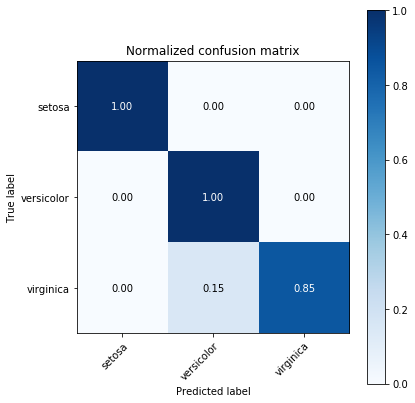

In [35]:
k_values = range(2,31,1)

knn_f1_values = []
knn_acc_values = []
knn_pre_values = []
knn_rec_values = []

# Variar o K
for ki in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=ki)
    knn_scores = execicio3medidas(knn, iris)
    
    knn_f1_values.append(knn_scores[0])
    knn_acc_values.append(knn_scores[1])
    knn_pre_values.append(knn_scores[2])
    knn_rec_values.append(knn_scores[3])

plt.plot(k_values, knn_acc_values, 'g',
         k_values, knn_f1_values, 'm',
         k_values, knn_pre_values, 'k',
         k_values, knn_rec_values, 'b')
plt.legend(["Acc", "F1", "Precision", "Recall"])
plt.show()

best_k = k_values[np.argmax(knn_f1_values)]
print("Best K:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
plot_confusion_matrix(y_test, y_pred,iris.target_names, normalize=True)
plt.show

# Exercício 4

In [54]:
scorings = ['f1_macro', 'accuracy', 'precision_macro', 'recall_macro']

def exercicio4(dataset, k, scoring=scorings):
    # Criar o classificador
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Calcular scores
    scores = cross_validate(knn, dataset.data, dataset.target, cv=5, scoring=scoring)
    
    return [
        np.mean(scores['test_f1_macro']),
        np.mean(scores['test_accuracy']),
        np.mean(scores['test_precision_macro']),
        np.mean(scores['test_recall_macro'])
    ]

In [55]:
k_values = range(2,21,1)

knn_f1_values = []
knn_acc_values = []
knn_pre_values = []
knn_rec_values = []

# Variar o K
for ki in k_values:
    
    # Testar
    knn_scores = exercicio4(digits, ki)
    
    # Salvar resultados
    knn_f1_values.append(knn_scores[0])
    knn_acc_values.append(knn_scores[1])
    knn_pre_values.append(knn_scores[2])
    knn_rec_values.append(knn_scores[3])
    
    # Mostrar cada execução
    print(f"{ki}-nearest-neighbors")
    print("F1", knn_scores[0])
    print("Accuracy", knn_scores[1])
    print("Precision", knn_scores[2])
    print("Recall", knn_scores[3])

2-nearest-neighbors
F1 0.9665003141969504
Accuracy 0.9666281215002192
Precision 0.968315441378141
Recall 0.9664630176394882
3-nearest-neighbors
F1 0.9660439437469768
Accuracy 0.9661143537042125
Precision 0.9674689103190104
Recall 0.9660646276528629
4-nearest-neighbors
F1 0.9637865984288314
Accuracy 0.9639057779662252
Precision 0.9660705327247274
Recall 0.9636703005526535
5-nearest-neighbors
F1 0.9626840774309724
Accuracy 0.9627899114966898
Precision 0.9646880893962757
Recall 0.9626209655033184
6-nearest-neighbors
F1 0.9591062832233277
Accuracy 0.9594189778290522
Precision 0.9611635863991748
Recall 0.9591604966310848
7-nearest-neighbors
F1 0.9596998493904859
Accuracy 0.9600006636118843
Precision 0.9616679779500613
Recall 0.9597628132334014
8-nearest-neighbors
F1 0.957428886247666
Accuracy 0.9577720868648678
Precision 0.9594769792645179
Recall 0.9575724127488833
9-nearest-neighbors
F1 0.9556282108886283
Accuracy 0.9561253164543428
Precision 0.9582702774080107
Recall 0.9558740000504706
10

Best k: 2


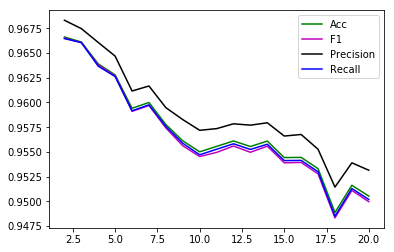

In [56]:
print("Best k:", k_values[np.argmax(knn_f1_values)])

plt.plot(k_values, knn_acc_values, 'g',
         k_values, knn_f1_values, 'm',
         k_values, knn_pre_values, 'k',
         k_values, knn_rec_values, 'b')
plt.legend(["Acc", "F1", "Precision", "Recall"])
plt.show()